In [1]:
import findspark
findspark.init()

In [3]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 14.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 5.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 1.6 MB/s eta 0:00:0000:0100:01


In [8]:
!pip3 install happybase

Defaulting to user installation because normal site-packages is not writeable
  Using cached happybase-1.2.0-py2.py3-none-any.whl
  Using cached thriftpy2-0.4.16.tar.gz (643 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for thriftpy2: filename=thriftpy2-0.4.16-cp39-cp39-linux_x86_64.whl size=997598 sha256=44a5fba5348592cf8cd577d44b6ffd0c9862e7b5a27176105d0a6b31ccb7f700
  Stored in directory: /home/vagrant/.cache/pip/wheels/9c/8a/a1/48fb2b2891089ca941bf50691a46a2d7789c71fc1c8c82a5f4
Successfully built thriftpy2


In [11]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import expr
import pandas as pd
import numpy as np
import happybase

appName= "hive_pyspark"
master= "local[2]"
spark = SparkSession.builder.master(master).appName(appName).enableHiveSupport().getOrCreate()

In [13]:
df =spark.sql("""
    select count(*) as number, Artists
    from 
        hot_100
    group by 
        Artists
    order by 
     number desc
    """).toPandas()

In [14]:
df.head()

,number,Artists
0,1089,"(None, Drake)"
1,954,"(None, Taylor Swift)"
2,823,"(None, Rihanna)"
3,700,"(None, Kenny Chesney)"
4,677,"(None, Maroon 5)"


In [15]:
VM_address = 'vl32.mini.pw.edu.pl'
connection = happybase.Connection(VM_address, port=9090)

In [16]:
Spotify = connection.table('RankingData')

In [18]:
!pip3 install hbspark

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import hbspark
from pyspark.sql import SparkSession
spark_session = SparkSession.builder.appName('Reading HBase').master('local[2]').getOrCreate()
hbspark.connect('127.0.0.1', spark_session)
Ranking_df = hbspark.table("table2").scan().toPandas()

In [21]:
Ranking_df

,RankingData:ranking,RankingData:time,RankingData:title,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type,rowkey
0,38,15:37:27,SNAP PACK,single,179551,false,[MapRecord[{element=https://api.spotify.com/v1...,46,2022-07-15,day,track,spotify:track:6zJejIfVYLgjud3lTk4DLB,https://open.spotify.com/album/2nzuzJvr3yowqbP...,5,album,003d7690f15ff9cbdfb448d5dfa4d4e2dfe177fab70dbb...
1,25,15:36:20,Miss You,single,206000,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2022-08-05,day,track,spotify:track:73vIOb4Q7YN6HeJTbscRx5,https://open.spotify.com/album/32G4vFNwLJQjpzk...,1,album,0059e8d6742354d56e00e1fb50eb200a5b8728909f1e95...
2,38,15:36:20,SNAP PACK,single,179551,false,[MapRecord[{element=https://api.spotify.com/v1...,46,2022-07-15,day,track,spotify:track:6zJejIfVYLgjud3lTk4DLB,https://open.spotify.com/album/2nzuzJvr3yowqbP...,5,album,008f25b5c6d8957485f86089b219194aad01d58c376bda...
3,2,15:39:21,HEROES & VILLAINS,album,221520,false,[MapRecord[{element=https://api.spotify.com/v1...,97,2022-12-02,day,track,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://open.spotify.com/album/7txGsnDSqVMoRl6...,15,album,00e6b57e4a2f7c6ced476796bd24eb87ea9cefdc96ebfa...
4,3,15:36:20,Unholy (feat. Kim Petras),single,156943,false,[MapRecord[{element=https://api.spotify.com/v1...,100,2022-09-22,day,track,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://open.spotify.com/album/0gX9tkL5njRax8y...,1,album,01d60ca8b219543a875a1444086e54f63e44a334340866...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,15:37:27,Unholy (feat. Kim Petras),single,156943,false,[MapRecord[{element=https://api.spotify.com/v1...,100,2022-09-22,day,track,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://open.spotify.com/album/0gX9tkL5njRax8y...,1,album,f7ed0c480671821a9cf1fc567a630dab516c8ad79d54b2...
196,9,15:36:20,Ditto,single,185506,false,[MapRecord[{element=https://api.spotify.com/v1...,92,2022-12-19,day,track,spotify:track:3r8RuvgbX9s7ammBn07D3W,https://open.spotify.com/album/7bnqo1fdJU9nSfX...,1,album,fa5e2138fe94b617864f40083868eb05c43bf287c7790e...
197,25,15:39:21,Miss You,single,206000,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2022-08-05,day,track,spotify:track:73vIOb4Q7YN6HeJTbscRx5,https://open.spotify.com/album/32G4vFNwLJQjpzk...,1,album,fa8a0c653d1e22f3856cb6b6e78d22d43a90d17fa85c48...
198,28,15:37:27,NewJeans 'OMG',single,212253,false,[MapRecord[{element=https://api.spotify.com/v1...,88,2023-01-02,day,track,spotify:track:65FftemJ1DbbZ45DUfHJXE,https://open.spotify.com/album/45ozep8uHHnj5CC...,2,album,fa97f56e9c8abdf3222ec36c9cf6815c503b1c9c878825...


In [41]:
df2 = spark.sql("""
    select * from hot_100
    """).toPandas()

In [42]:
df2

,Artists,Name,Rank,Peak,Weeks,Week,Created
0,"(None, Lil Nas,)","(None, None, None, Old Town Road)",1,"(1, None)","(7, None)",2019-07-06,"April 5, 2019"
1,"(None, Shawn Mendes, Camila Cabello)","(None, None, None, Senorita)",2,"(None, NA)","(None, NA)",2019-07-06,"June 21, 2019"
2,"(None, Billie Eilish)","(None, None, None, Bad Guy)",3,"(2, None)","(13, None)",2019-07-06,"March 29, 2019"
3,"(None, Khalid)","(None, None, None, Talk)",4,"(3, None)","(20, None)",2019-07-06,"February 7, 2019"
4,"(None, Ed Sheeran, Justin Bieber)","(None, None, None, I Don't Care)",5,"(2, None)","(7, None)",2019-07-06,"May 10, 2019"
...,...,...,...,...,...,...,...
97220,"(None, Vitamin C)","(None, None, None, Smile)",95,"(None, NA)","(None, NA)",1999-07-12,None
97221,"(None, Collective Soul)","(None, None, None, Heavy)",96,"(73, None)","(20, None)",1999-07-12,None
97222,"(None, Mary Chapin Carpenter)","(None, None, None, Almost Home)",97,"(None, NA)","(None, NA)",1999-07-12,None
97223,"(None, Q)","(None, None, None, Vivrant Thing)",98,"(None, NA)","(None, NA)",1999-07-12,None


In [23]:
# Viz 1

In [86]:

df3 =spark.sql("""
    select Name, Artists, count(*) as number
    from 
        hot_100
    group by 
        Name, Artists
    order by 
     number desc
    """).toPandas()

In [88]:
df3

,Name,Artists,number
0,"(None, None, None, Radioactive)","(None, Imagine Dragons)",87
1,"(None, None, None, Sail)","(None, AWOLNATION)",79
2,"(None, None, None, I'm Yours)","(None, Jason Mraz)",76
3,"(None, None, None, Counting Stars)","(None, OneRepublic)",68
4,"(None, None, None, Rolling In The Deep)","(None, Adele)",65
...,...,...,...
7208,"(None, None, None, Yuck!)","(None, 2 Chainz)",1
7209,"(None, None, None, Valerie)","(None, Glee Cast)",1
7210,"(None, None, None, I'm Me)","(None, Lil Wayne)",1
7211,"(None, None, None, Saving Grace)","(None, Tom Petty)",1


In [89]:
Song_names = [i.member3 for i in df3.Name]

In [90]:
lap_songs = list(set(Song_names) & set(Ranking_df['RankingData:title']))

In [107]:
S_frames = [None] * len(lap_songs)
for i, song in enumerate(lap_songs):
    S_frames[i] = spark.sql(f"""
    select *
    from 
        hot_100
    where cast(Name as string) Like "%{song}%"
    """).toPandas()

In [140]:
for i in S_frames:
    i.Week = pd.to_datetime(i.Week)

In [164]:
S2_frames = [None] * len(lap_songs)
for i, song in enumerate(lap_songs):
    S2_frames[i] = Ranking_df.loc[Ranking_df['RankingData:title'] == song,:].reset_index()


In [165]:
S2_frames[0].loc[0,'RankingData:ranking']

'21'

,RankingData:ranking,RankingData:time,RankingData:title,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type,rowkey
50,21,15:36:20,Here With Me,single,242484,false,[MapRecord[{element=https://api.spotify.com/v1...,94,2022-09-22,day,track,spotify:track:78Sw5GDo6AlGwTwanjXbGh,https://open.spotify.com/album/0OuoHWf8yB0TPzo...,1,album,3e9faaa939e2246f84f4fe8ad57a37c027292dc0cc1673...
113,21,15:38:33,Here With Me,single,242484,false,[MapRecord[{element=https://api.spotify.com/v1...,94,2022-09-22,day,track,spotify:track:78Sw5GDo6AlGwTwanjXbGh,https://open.spotify.com/album/0OuoHWf8yB0TPzo...,1,album,91fd81e2d07e29bea571b59deeaddf107207a1a8ae9672...
144,21,15:37:27,Here With Me,single,242484,false,[MapRecord[{element=https://api.spotify.com/v1...,94,2022-09-22,day,track,spotify:track:78Sw5GDo6AlGwTwanjXbGh,https://open.spotify.com/album/0OuoHWf8yB0TPzo...,1,album,b50e3a74bd7b7077e8897c8f4d93b4aad63cee61d949d1...
145,21,15:39:21,Here With Me,single,242484,false,[MapRecord[{element=https://api.spotify.com/v1...,94,2022-09-22,day,track,spotify:track:78Sw5GDo6AlGwTwanjXbGh,https://open.spotify.com/album/0OuoHWf8yB0TPzo...,1,album,b644d7306382d4c53ce5ec25dd5fcef8d7ace4bf788297...


In [122]:
k['SongDetails:spotify'][36]

'https://open.spotify.com/album/07w0rG5TETcyihsEIZR3qG'

In [129]:
# Plot

In [134]:
import matplotlib.pyplot as plt

In [151]:
S2_frames[1]

,RankingData:ranking,RankingData:time,RankingData:title,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type,rowkey
20,20,15:36:20,Starboy,album,260253,false,[MapRecord[{element=https://api.spotify.com/v1...,90,2016-11-24,day,track,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,https://open.spotify.com/album/4AdZV63ycxFLF6H...,18,album,0fd035ee37590f867565b9bdfc3f6f71b9cf29bc9d42f0...
83,47,15:37:27,Starboy,album,230453,false,[MapRecord[{element=https://api.spotify.com/v1...,92,2016-11-25,day,track,spotify:track:7MXVkk9YMctZqd1Srtv4MB,https://open.spotify.com/album/2ODvWsOgouMbaA5...,18,album,64a2723c4a1f562c77398235380f073ebbeb55713ea71a...
139,20,15:39:21,Starboy,album,260253,false,[MapRecord[{element=https://api.spotify.com/v1...,90,2016-11-24,day,track,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,https://open.spotify.com/album/4AdZV63ycxFLF6H...,18,album,b04a7d2bb5b78bdb7ed1a9b241494641bd7a5ae420feed...
167,47,15:39:21,Starboy,album,230453,false,[MapRecord[{element=https://api.spotify.com/v1...,92,2016-11-25,day,track,spotify:track:7MXVkk9YMctZqd1Srtv4MB,https://open.spotify.com/album/2ODvWsOgouMbaA5...,18,album,d21cbadd6cd88341defef9caf9c9c197b6d51d75d4d74c...
184,20,15:38:33,Starboy,album,260253,false,[MapRecord[{element=https://api.spotify.com/v1...,90,2016-11-24,day,track,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,https://open.spotify.com/album/4AdZV63ycxFLF6H...,18,album,e5f03f8469fcb4e32fa1c4cfbea6e9a4ae7bd5f9578008...
186,47,15:36:20,Starboy,album,230453,false,[MapRecord[{element=https://api.spotify.com/v1...,92,2016-11-25,day,track,spotify:track:7MXVkk9YMctZqd1Srtv4MB,https://open.spotify.com/album/2ODvWsOgouMbaA5...,18,album,e900632a6a4caa5acf88e6e7f4920c5745699ebeb47600...
194,47,15:38:33,Starboy,album,230453,false,[MapRecord[{element=https://api.spotify.com/v1...,92,2016-11-25,day,track,spotify:track:7MXVkk9YMctZqd1Srtv4MB,https://open.spotify.com/album/2ODvWsOgouMbaA5...,18,album,f536bbd5dc01906d0de9c6c1907e0579623deb1de307bc...
199,20,15:37:27,Starboy,album,260253,false,[MapRecord[{element=https://api.spotify.com/v1...,90,2016-11-24,day,track,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,https://open.spotify.com/album/4AdZV63ycxFLF6H...,18,album,fdd3fd06308eeeec29cada3aee03b85d419dddb3dd1871...


In [150]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2023-01-12


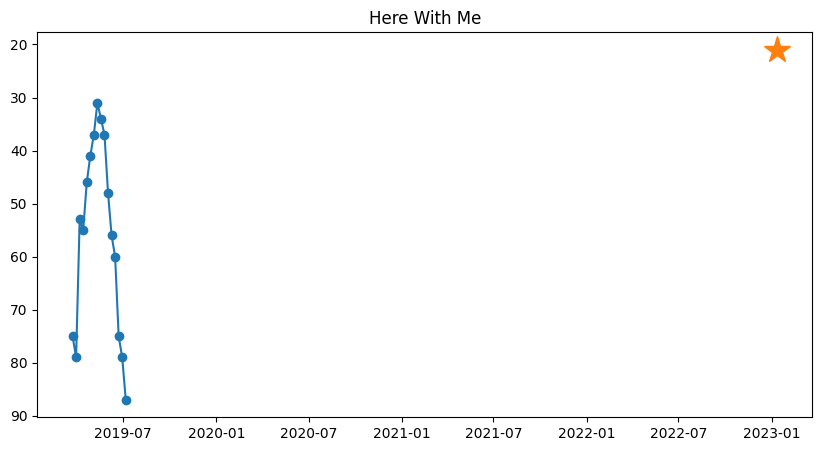

In [184]:
i = 0

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.gca().invert_yaxis()
plt.title(lap_songs[i])
plt.plot('Week', 'Rank', data=S_frames[i], linestyle='-', marker='o', )
plt.plot(today, int(S2_frames[i].loc[0,'RankingData:ranking']), marker='*', ls='none', ms=20)
plt.savefig(f'plot_{lap_songs[i]}.png')

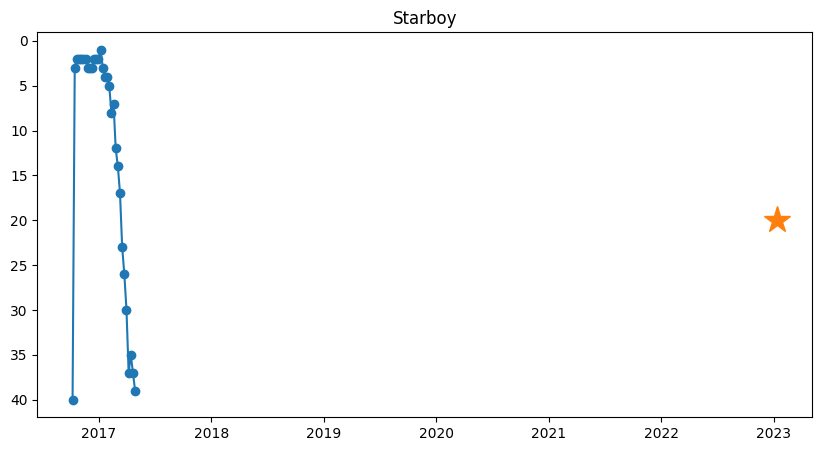

In [185]:
i = 1

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.gca().invert_yaxis()
plt.title(lap_songs[i])
plt.plot('Week', 'Rank', data=S_frames[i], linestyle='-', marker='o', )
plt.plot(today, int(S2_frames[i].loc[0,'RankingData:ranking']), marker='*', ls='none', ms=20)
plt.show()

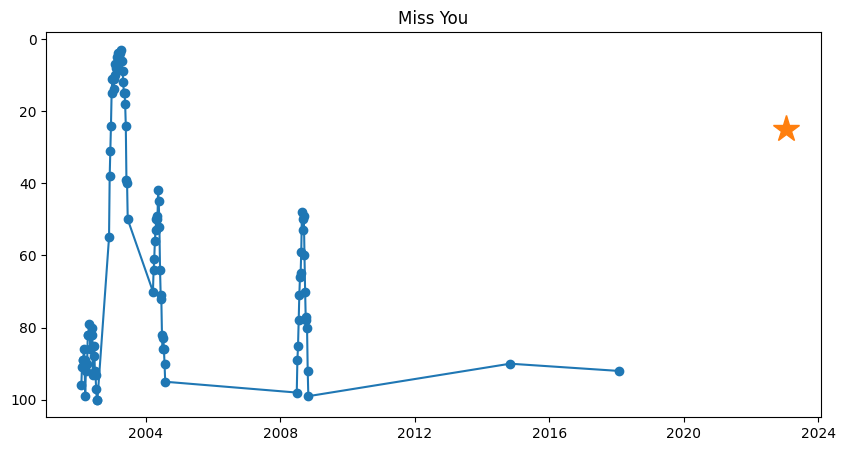

In [186]:
i = 2

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.gca().invert_yaxis()
plt.title(lap_songs[i])
plt.plot('Week', 'Rank', data=S_frames[i], linestyle='-', marker='o', )
plt.plot(today, int(S2_frames[i].loc[0,'RankingData:ranking']), marker='*', ls='none', ms=20)
plt.show()

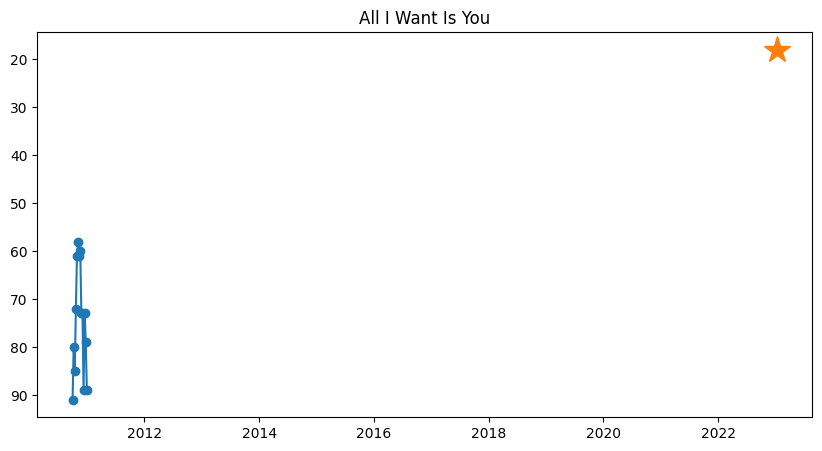

In [187]:
i = 3

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.gca().invert_yaxis()
plt.title(lap_songs[i])
plt.plot('Week', 'Rank', data=S_frames[i], linestyle='-', marker='o', )
plt.plot(today, int(S2_frames[i].loc[0,'RankingData:ranking']), marker='*', ls='none', ms=20)
plt.show()

In [195]:
Ranking_df['SongDetails:release_date'] = pd.to_datetime(Ranking_df['SongDetails:release_date'])

In [201]:
Ranking_df['SongDetails:release_date'] < '2020-01-01'

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199     True
Name: SongDetails:release_date, Length: 200, dtype: bool

In [202]:
Real_ranking = Ranking_df.loc[Ranking_df['SongDetails:release_date'] < '2020-01-01',:]

In [206]:
Real_ranking

,RankingData:ranking,RankingData:time,RankingData:title,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type,rowkey
6,36,15:38:33,Born This Way (Special Edition),album,244760,false,[MapRecord[{element=https://api.spotify.com/v1...,82,2011-01-01,day,track,spotify:track:11BKm0j4eYoCPPpCONAVwA,https://open.spotify.com/album/5maeycU97NHBgwR...,22,album,02e225a6ecd489e109dcea9309a64d7f1b250e31445ac3...
7,14,15:39:21,Long Way Down,album,244360,false,[MapRecord[{element=https://api.spotify.com/v1...,67,2013-06-17,day,track,spotify:track:7jtQIBanIiJOMS6RyCx6jZ,https://open.spotify.com/album/0KGBW1MQtC2aFPC...,10,album,03f06fd5b506fdfa26ea25e55b802421aab15298ecc446...
11,39,15:37:27,I Love You.,album,240400,false,[MapRecord[{element=https://api.spotify.com/v1...,93,2013-04-19,day,track,spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,https://open.spotify.com/album/4xkM0BwLM9H2IUc...,11,album,0af3ac141b9292cfd2c8f179e08dfa54a69e4a51d4fe20...
20,20,15:36:20,Starboy,album,260253,false,[MapRecord[{element=https://api.spotify.com/v1...,90,2016-11-24,day,track,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,https://open.spotify.com/album/4AdZV63ycxFLF6H...,18,album,0fd035ee37590f867565b9bdfc3f6f71b9cf29bc9d42f0...
26,18,15:39:21,All I Want Is You,album,195373,false,[MapRecord[{element=https://api.spotify.com/v1...,91,2010-11-26,day,track,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://open.spotify.com/album/493HYe7N5pleudE...,13,album,1b61c38e62eb55608ec72a63dc78b8601502c6562854cd...
28,29,15:39:21,AM,album,183956,false,[MapRecord[{element=https://api.spotify.com/v1...,94,2013-09-09,day,track,spotify:track:5XeFesFbtLpXzIVDNQP22n,https://open.spotify.com/album/78bpIziExqiI9qz...,12,album,2163244c692bc96a999fba7fbc67efd82449fc43d1a5cc...
45,33,15:37:27,Indigo (Extended),album,184613,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2019-10-04,day,track,spotify:track:5IgjP7X4th6nMNDh4akUHb,https://open.spotify.com/album/3okhA6w5uau6ZNh...,42,album,385905d1eb1f8327471f9f38e96dfa2ad180f9717990a7...
61,33,15:36:20,Indigo (Extended),album,184613,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2019-10-04,day,track,spotify:track:5IgjP7X4th6nMNDh4akUHb,https://open.spotify.com/album/3okhA6w5uau6ZNh...,42,album,4e5e12a5d16849bc757c6abf6bbbda00656a8e903018e7...
71,39,15:39:21,I Love You.,album,240400,false,[MapRecord[{element=https://api.spotify.com/v1...,93,2013-04-19,day,track,spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,https://open.spotify.com/album/4xkM0BwLM9H2IUc...,11,album,5ad589db9bb701ece59e67471b6631dc8cdbca199a61e4...
75,33,15:39:21,Indigo (Extended),album,184613,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2019-10-04,day,track,spotify:track:5IgjP7X4th6nMNDh4akUHb,https://open.spotify.com/album/3okhA6w5uau6ZNh...,42,album,5c01c923b9629de15ef183be3f27ff501978c0a3266437...


In [226]:
Real_songs = []
for i in range(len(Song_names)):
    if (str(Song_names[i]) in str(Real_ranking['RankingData:title']) ):
        Real_songs.append(Song_names[i])

In [225]:
'Born This Way' in str(Real_ranking['RankingData:title'])

True

In [229]:
# Billboard vizualizations

In [255]:
bf =spark.sql("""
    select Name, Artists, count(*) as number
    from 
        hot_100
    group by 
        Name, Artists
    order by 
     number desc
    """).toPandas()

In [249]:
bf2 =spark.sql("""
    select Artists, count(*) as number
    from 
        hot_100
    group by 
         Artists
    order by 
     number desc
    """).toPandas()

KeyboardInterrupt: 

In [252]:
df

,number,Artists
0,1089,"(None, Drake)"
1,954,"(None, Taylor Swift)"
2,823,"(None, Rihanna)"
3,700,"(None, Kenny Chesney)"
4,677,"(None, Maroon 5)"
...,...,...
1952,1,"(None, I Prevail)"
1953,1,"(None, Stevie Wonder)"
1954,1,"(None, Ariana Grande, John Legend)"
1955,1,"(None, deadmau5)"


In [256]:
bf.Name = [i.member3 for i in bf.Name]

In [258]:
bf.Artists = [i.member1 for i in bf.Artists]

In [264]:
np.array(bf[bf.Artists == 'Drake'].Name)

array(["God's Plan", 'One Dance', 'Hotline Bling', 'The Motto',
       'Take Care', "Hold On, We're Going Home", 'Too Good', 'Controlla',
       'Headlines', 'Fake Love', 'Nice For What', 'Best I Ever Had',
       'Forever', 'Started From The Bottom', 'Nonstop', 'In My Feelings',
       'Find Your Love', 'Make Me Proud', 'Know Yourself', 'Miss Me',
       'Fancy', 'Energy', 'All Me', '0 To 100 / The Catch Up', 'Over',
       'HYFR', 'Passionfruit', 'The Language', 'Back To Back',
       'Crew Love', 'Right Hand', 'Successful', 'Portland', "I'm Upset",
       "Sneakin'", 'Summer Sixteen', '10 Bands', 'Legend', 'Gyalchester',
       'Worst Behavior', 'Still Here', 'Hype',
       'Pound Cake / Paris Morton Music 2', 'Grammys', 'Mob Ties',
       'With You', 'Feel No Ways', 'Signs', "Don't Matter To Me", None,
       'Teenage Fever', 'Blem', 'U With Me?', "Can't Take A Joke",
       'Free Smoke', 'Fire & Desire', 'Emotionless', 'Elevate',
       '8 Out Of 10', 'Diplomatic Immunity', 'Blue 

In [266]:
df.Artists = [i.member1 for i in df.Artists]

In [269]:
df_10 = df[:10]

In [270]:
df_10

,number,Artists
0,1089,Drake
1,954,Taylor Swift
2,823,Rihanna
3,700,Kenny Chesney
4,677,Maroon 5
5,665,Keith Urban
6,651,Beyonce
7,637,Chris Brown
8,627,Tim McGraw
9,624,Rascal Flatts


In [293]:
bf_10 = bf.groupby('Artists').agg({'Name':'count', 'number':sum}).sort_values('number', ascending=False)[:10]

In [294]:
bf_10

,Name,number
Artists,,
Drake,114,1089
Taylor Swift,72,954
Rihanna,37,823
Kenny Chesney,41,700
Maroon 5,29,677
Keith Urban,37,665
Beyonce,44,651
Chris Brown,43,637
Tim McGraw,39,627


In [296]:
bf_10.index

Index(['Drake', 'Taylor Swift', 'Rihanna', 'Kenny Chesney', 'Maroon 5',
       'Keith Urban', 'Beyonce', 'Chris Brown', 'Tim McGraw', 'Rascal Flatts'],
      dtype='object', name='Artists')

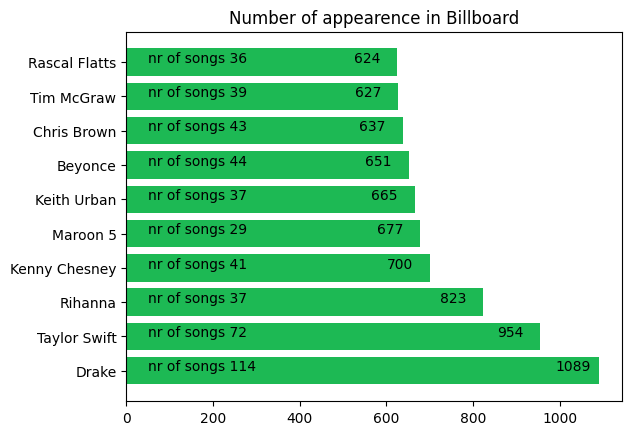

In [307]:
plt.barh(bf_10.index, bf_10.number, color='#1DB954')
plt.title('Number of appearence in Billboard')

for i in range(10):
    plt.text(y = i , x = bf_10.number[i]-100, s = bf_10.number[i], size = 10)
    plt.text(y = i , x = 50, s = 'nr of songs ' + str(bf_10.Name[i]), size = 10)

    
plt.show()

In [ ]:
# Viz 3

In [308]:
Ranking_df

,RankingData:ranking,RankingData:time,RankingData:title,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type,rowkey
0,38,15:37:27,SNAP PACK,single,179551,false,[MapRecord[{element=https://api.spotify.com/v1...,46,2022-07-15,day,track,spotify:track:6zJejIfVYLgjud3lTk4DLB,https://open.spotify.com/album/2nzuzJvr3yowqbP...,5,album,003d7690f15ff9cbdfb448d5dfa4d4e2dfe177fab70dbb...
1,25,15:36:20,Miss You,single,206000,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2022-08-05,day,track,spotify:track:73vIOb4Q7YN6HeJTbscRx5,https://open.spotify.com/album/32G4vFNwLJQjpzk...,1,album,0059e8d6742354d56e00e1fb50eb200a5b8728909f1e95...
2,38,15:36:20,SNAP PACK,single,179551,false,[MapRecord[{element=https://api.spotify.com/v1...,46,2022-07-15,day,track,spotify:track:6zJejIfVYLgjud3lTk4DLB,https://open.spotify.com/album/2nzuzJvr3yowqbP...,5,album,008f25b5c6d8957485f86089b219194aad01d58c376bda...
3,2,15:39:21,HEROES & VILLAINS,album,221520,false,[MapRecord[{element=https://api.spotify.com/v1...,97,2022-12-02,day,track,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://open.spotify.com/album/7txGsnDSqVMoRl6...,15,album,00e6b57e4a2f7c6ced476796bd24eb87ea9cefdc96ebfa...
4,3,15:36:20,Unholy (feat. Kim Petras),single,156943,false,[MapRecord[{element=https://api.spotify.com/v1...,100,2022-09-22,day,track,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://open.spotify.com/album/0gX9tkL5njRax8y...,1,album,01d60ca8b219543a875a1444086e54f63e44a334340866...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,15:37:27,Unholy (feat. Kim Petras),single,156943,false,[MapRecord[{element=https://api.spotify.com/v1...,100,2022-09-22,day,track,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://open.spotify.com/album/0gX9tkL5njRax8y...,1,album,f7ed0c480671821a9cf1fc567a630dab516c8ad79d54b2...
196,9,15:36:20,Ditto,single,185506,false,[MapRecord[{element=https://api.spotify.com/v1...,92,2022-12-19,day,track,spotify:track:3r8RuvgbX9s7ammBn07D3W,https://open.spotify.com/album/7bnqo1fdJU9nSfX...,1,album,fa5e2138fe94b617864f40083868eb05c43bf287c7790e...
197,25,15:39:21,Miss You,single,206000,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2022-08-05,day,track,spotify:track:73vIOb4Q7YN6HeJTbscRx5,https://open.spotify.com/album/32G4vFNwLJQjpzk...,1,album,fa8a0c653d1e22f3856cb6b6e78d22d43a90d17fa85c48...
198,28,15:37:27,NewJeans 'OMG',single,212253,false,[MapRecord[{element=https://api.spotify.com/v1...,88,2023-01-02,day,track,spotify:track:65FftemJ1DbbZ45DUfHJXE,https://open.spotify.com/album/45ozep8uHHnj5CC...,2,album,fa97f56e9c8abdf3222ec36c9cf6815c503b1c9c878825...


In [335]:
Ranking_df

,RankingData:ranking,RankingData:time,RankingData:title,SongDetails:album_type,SongDetails:duration_ms,SongDetails:episode,SongDetails:href,SongDetails:popularity,SongDetails:release_date,SongDetails:release_date_precision,SongDetails:song_type,SongDetails:song_uri,SongDetails:spotify,SongDetails:total_tracks,SongDetails:type,rowkey
0,38,15:37:27,SNAP PACK,single,179551,false,[MapRecord[{element=https://api.spotify.com/v1...,46,2022-07-15,day,track,spotify:track:6zJejIfVYLgjud3lTk4DLB,https://open.spotify.com/album/2nzuzJvr3yowqbP...,5,album,003d7690f15ff9cbdfb448d5dfa4d4e2dfe177fab70dbb...
1,25,15:36:20,Miss You,single,206000,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2022-08-05,day,track,spotify:track:73vIOb4Q7YN6HeJTbscRx5,https://open.spotify.com/album/32G4vFNwLJQjpzk...,1,album,0059e8d6742354d56e00e1fb50eb200a5b8728909f1e95...
2,38,15:36:20,SNAP PACK,single,179551,false,[MapRecord[{element=https://api.spotify.com/v1...,46,2022-07-15,day,track,spotify:track:6zJejIfVYLgjud3lTk4DLB,https://open.spotify.com/album/2nzuzJvr3yowqbP...,5,album,008f25b5c6d8957485f86089b219194aad01d58c376bda...
3,2,15:39:21,HEROES & VILLAINS,album,221520,false,[MapRecord[{element=https://api.spotify.com/v1...,97,2022-12-02,day,track,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://open.spotify.com/album/7txGsnDSqVMoRl6...,15,album,00e6b57e4a2f7c6ced476796bd24eb87ea9cefdc96ebfa...
4,3,15:36:20,Unholy (feat. Kim Petras),single,156943,false,[MapRecord[{element=https://api.spotify.com/v1...,100,2022-09-22,day,track,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://open.spotify.com/album/0gX9tkL5njRax8y...,1,album,01d60ca8b219543a875a1444086e54f63e44a334340866...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,15:37:27,Unholy (feat. Kim Petras),single,156943,false,[MapRecord[{element=https://api.spotify.com/v1...,100,2022-09-22,day,track,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://open.spotify.com/album/0gX9tkL5njRax8y...,1,album,f7ed0c480671821a9cf1fc567a630dab516c8ad79d54b2...
196,9,15:36:20,Ditto,single,185506,false,[MapRecord[{element=https://api.spotify.com/v1...,92,2022-12-19,day,track,spotify:track:3r8RuvgbX9s7ammBn07D3W,https://open.spotify.com/album/7bnqo1fdJU9nSfX...,1,album,fa5e2138fe94b617864f40083868eb05c43bf287c7790e...
197,25,15:39:21,Miss You,single,206000,false,[MapRecord[{element=https://api.spotify.com/v1...,95,2022-08-05,day,track,spotify:track:73vIOb4Q7YN6HeJTbscRx5,https://open.spotify.com/album/32G4vFNwLJQjpzk...,1,album,fa8a0c653d1e22f3856cb6b6e78d22d43a90d17fa85c48...
198,28,15:37:27,NewJeans 'OMG',single,212253,false,[MapRecord[{element=https://api.spotify.com/v1...,88,2023-01-02,day,track,spotify:track:65FftemJ1DbbZ45DUfHJXE,https://open.spotify.com/album/45ozep8uHHnj5CC...,2,album,fa97f56e9c8abdf3222ec36c9cf6815c503b1c9c878825...


In [352]:
l = [(int(i)/1000) for i in Ranking_df['SongDetails:duration_ms']]

In [346]:
Ranking_df['time'] = [(int(i)/1000) for i in Ranking_df['SongDetails:duration_ms']]

KeyboardInterrupt: 

In [372]:
Ranking_df['time'] = [(int(i)/1000) for i in Ranking_df['SongDetails:duration_ms']]
Ranking_df['pop'] = [int(i) for i in Ranking_df['SongDetails:popularity']]
Ranking_df['ranking'] = [int(i) for i in Ranking_df['RankingData:ranking']]
Ranking_time = Ranking_df.groupby('ranking').agg({'time':np.mean,'pop':np.mean})

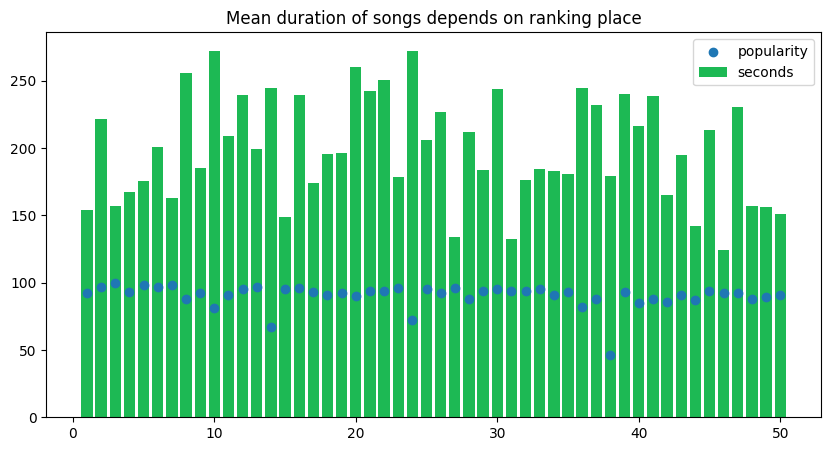

In [407]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.bar(Ranking_time.index, Ranking_time.time, color='#1DB954', label = 'seconds')
plt.scatter(x = Ranking_time.index, y = Ranking_time['pop'], label = 'popularity')
plt.title('Mean duration of songs depends on ranking place')
plt.legend()


    
plt.show()

In [ ]:
# Viz 4 

In [410]:
import re 
x = "This is a sentence. (once a day) [twice a day]"
re.sub("[\(\[].*?[\)\]]", "", x)
'This is a sentence.  '

'This is a sentence.  '

In [411]:
l = [re.sub("[\(\[].*?[\)\]]", "", x) for x in Real_ranking['RankingData:title']]

In [414]:
from difflib import SequenceMatcher

In [421]:
Songs = [str(i) for i in Song_names]

False